In [1]:
import pandas as pd
import os

DIR = "../../hyperparameter-sensitivity/results_oct/"
inflection_langs = ["albanian", "arabic", "haida", "catalan", "hungarian", "irish", "dutch", "romanian"]
g2p_langs = ["hun", "dut","arm_e","geo"]
arches = ["attentive_lstm", "transformer"]

infl_dfs = []
for l in inflection_langs:
    for arch in arches:
        p = os.path.join(DIR, f"{l}-{arch}-sig-2017-inflection.tsv")
        df = pd.read_csv(p, sep="\t")[:200]
        df["lang"] = l
        infl_dfs.append(df)
        
infl_df = pd.concat(infl_dfs).reset_index(drop=True)
infl_df

,Unnamed: 0,arch,beta1,beta2,expert,factor,min_lr,dropout,end_idx,pad_idx,...,_timestamp,_step,lr-Adam,_runtime,trainer/global_step,epoch,train_loss,max_val_accuracy,name,lang
0,0,attentive_lstm,0.863750,0.993595,NaN,0.528679,0.000779,0.264289,3,1,...,1.694935e+09,882,2.365218e-04,2212.937449,12935,391,0.031570,0.997,eager-sweep-253,albanian
1,1,attentive_lstm,0.989284,0.994138,NaN,0.621057,0.000893,0.458683,3,1,...,1.694956e+09,1629,3.966330e-05,23456.366137,20271,723,0.766370,0.996,young-sweep-252,albanian
2,2,attentive_lstm,0.846564,0.981249,NaN,0.202330,0.000679,0.278919,3,1,...,1.694942e+09,1395,6.066826e-06,9535.610379,48979,619,0.315373,0.994,pleasant-sweep-251,albanian
3,3,attentive_lstm,0.909853,0.996069,NaN,0.803050,0.000089,0.274517,3,1,...,1.694933e+09,720,7.660760e-05,2023.276586,18239,319,1.067806,0.995,dark-sweep-250,albanian
4,4,attentive_lstm,0.857490,0.983258,NaN,0.492412,0.000768,0.366085,3,1,...,1.694953e+09,729,1.188652e-03,22514.093502,11015,323,0.328048,0.997,earthy-sweep-249,albanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,195,transformer,0.909047,0.984157,NaN,0.620971,0.000798,0.014631,3,1,...,1.696558e+09,972,7.983341e-04,1560.303904,17279,431,0.069173,0.896,confused-sweep-168,romanian
3196,196,transformer,0.852765,0.987791,NaN,0.220311,0.000994,0.343258,3,1,...,1.696559e+09,1800,1.217364e-05,2907.360646,39999,799,0.559408,0.699,mild-sweep-167,romanian
3197,197,transformer,0.996315,0.991065,NaN,0.809354,0.000413,0.463361,3,1,...,1.696559e+09,1800,4.695051e-06,2980.083133,43999,799,1.759001,0.312,bright-sweep-165,romanian
3198,198,transformer,0.845477,0.981828,NaN,0.562818,0.000158,0.088406,3,1,...,1.696558e+09,1314,2.587762e-05,2459.690992,30367,583,0.671783,0.890,autumn-sweep-163,romanian


In [2]:
g2p_dfs = []
for l in g2p_langs:
    for arch in arches:
        p = os.path.join(DIR, f"{l}-{arch}-sig-2021-g2p.tsv")
        df = pd.read_csv(p, sep="\t")
        df["lang"] = l
        g2p_dfs.append(df)
        
g2p_df = pd.concat(g2p_dfs).reset_index(drop=True)
g2p_df.head() 

,Unnamed: 0,arch,beta1,beta2,expert,factor,min_lr,dropout,end_idx,pad_idx,...,lr-Adam,_runtime,_timestamp,_step,train_loss,trainer/global_step,val_loss,max_val_accuracy,name,lang
0,0,attentive_lstm,0.991438,0.983856,NaN,0.612446,0.000895,0.199986,3,1,...,1.004415e-04,18059.230230,1.695778e+09,1179,0.503862,12051,0.531652,0.987,divine-sweep-283,hun
1,1,attentive_lstm,0.864567,0.996867,NaN,0.134937,0.000111,0.125272,3,1,...,3.657541e-04,47671.429004,1.691448e+09,1341,0.801278,148999,0.832095,0.984,smart-sweep-285,hun
2,2,attentive_lstm,0.855516,0.997719,NaN,0.776448,0.000233,0.316894,3,1,...,7.611029e-07,19558.215883,1.691417e+09,1800,0.372784,199999,0.427029,0.968,fine-sweep-284,hun
3,3,attentive_lstm,0.871065,0.994157,NaN,0.504334,0.000823,0.477863,3,1,...,8.499548e-07,35655.040238,1.691433e+09,1800,0.453696,199999,0.549492,0.893,giddy-sweep-283,hun
4,4,attentive_lstm,0.966940,0.998022,NaN,0.515574,0.000462,0.296379,3,1,...,4.619898e-04,41834.427231,1.691436e+09,1800,0.700169,199999,0.738375,0.980,electric-sweep-282,hun


In [3]:
# Drops rows not within 5 acc pointsof best for the respective langauge/arch.
print(len(infl_df))
filtered_infl_df = infl_df.copy()
for lang in inflection_langs:
    for arch in arches:
        lang_df = filtered_infl_df.loc[(infl_df["lang"] == lang) & (filtered_infl_df["arch"] == arch)]
        m = lang_df["max_val_accuracy"].max()
        idxs = lang_df.loc[lang_df["max_val_accuracy"] < (m - .05)].index.tolist()
#         print(idxs)
        filtered_infl_df = filtered_infl_df.drop(idxs)
#         print(lang, arch)
        print(len(filtered_infl_df))
filtered_infl_df

3200
3180
3113
3072
2982
2955
2875
2850
2788
2729
2651
2590
2486
2457
2379
2318
2226


,Unnamed: 0,arch,beta1,beta2,expert,factor,min_lr,dropout,end_idx,pad_idx,...,_timestamp,_step,lr-Adam,_runtime,trainer/global_step,epoch,train_loss,max_val_accuracy,name,lang
0,0,attentive_lstm,0.863750,0.993595,NaN,0.528679,0.000779,0.264289,3,1,...,1.694935e+09,882,0.000237,2212.937449,12935,391,0.031570,0.997,eager-sweep-253,albanian
1,1,attentive_lstm,0.989284,0.994138,NaN,0.621057,0.000893,0.458683,3,1,...,1.694956e+09,1629,0.000040,23456.366137,20271,723,0.766370,0.996,young-sweep-252,albanian
2,2,attentive_lstm,0.846564,0.981249,NaN,0.202330,0.000679,0.278919,3,1,...,1.694942e+09,1395,0.000006,9535.610379,48979,619,0.315373,0.994,pleasant-sweep-251,albanian
3,3,attentive_lstm,0.909853,0.996069,NaN,0.803050,0.000089,0.274517,3,1,...,1.694933e+09,720,0.000077,2023.276586,18239,319,1.067806,0.995,dark-sweep-250,albanian
4,4,attentive_lstm,0.857490,0.983258,NaN,0.492412,0.000768,0.366085,3,1,...,1.694953e+09,729,0.001189,22514.093502,11015,323,0.328048,0.997,earthy-sweep-249,albanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,190,transformer,0.908426,0.997219,NaN,0.810751,0.000842,0.465785,3,1,...,1.696560e+09,1170,0.000246,3481.625939,22879,519,0.393868,0.896,dainty-sweep-174,romanian
3193,193,transformer,0.899689,0.995839,NaN,0.892580,0.000687,0.223937,3,1,...,1.696560e+09,1800,0.000026,3287.112053,55999,799,0.995004,0.893,warm-sweep-171,romanian
3194,194,transformer,0.908056,0.989475,NaN,0.681233,0.000842,0.169415,3,1,...,1.696559e+09,1800,0.001004,2447.485000,55999,799,1.088895,0.902,brisk-sweep-169,romanian
3195,195,transformer,0.909047,0.984157,NaN,0.620971,0.000798,0.014631,3,1,...,1.696558e+09,972,0.000798,1560.303904,17279,431,0.069173,0.896,confused-sweep-168,romanian


In [4]:
# Drops rows not within 5 acc pointsof best for the respective langauge/arch.
print(len(infl_df))
near_zero_infl_df = infl_df.copy()
for lang in inflection_langs:
    for arch in arches:
        lang_df = near_zero_infl_df.loc[(infl_df["lang"] == lang) & (near_zero_infl_df["arch"] == arch)]
        idxs = lang_df.loc[lang_df["max_val_accuracy"] < 0.1].index.tolist()
#         print(idxs)
        near_zero_infl_df = near_zero_infl_df.drop(idxs)
#         print(lang, arch)
        print(len(near_zero_infl_df))
near_zero_infl_df

3200
3188
3154
3135
3104
3080
3047
3028
3001
2983
2947
2927
2892
2882
2854
2844
2822


,Unnamed: 0,arch,beta1,beta2,expert,factor,min_lr,dropout,end_idx,pad_idx,...,_timestamp,_step,lr-Adam,_runtime,trainer/global_step,epoch,train_loss,max_val_accuracy,name,lang
0,0,attentive_lstm,0.863750,0.993595,NaN,0.528679,0.000779,0.264289,3,1,...,1.694935e+09,882,0.000237,2212.937449,12935,391,0.031570,0.997,eager-sweep-253,albanian
1,1,attentive_lstm,0.989284,0.994138,NaN,0.621057,0.000893,0.458683,3,1,...,1.694956e+09,1629,0.000040,23456.366137,20271,723,0.766370,0.996,young-sweep-252,albanian
2,2,attentive_lstm,0.846564,0.981249,NaN,0.202330,0.000679,0.278919,3,1,...,1.694942e+09,1395,0.000006,9535.610379,48979,619,0.315373,0.994,pleasant-sweep-251,albanian
3,3,attentive_lstm,0.909853,0.996069,NaN,0.803050,0.000089,0.274517,3,1,...,1.694933e+09,720,0.000077,2023.276586,18239,319,1.067806,0.995,dark-sweep-250,albanian
4,4,attentive_lstm,0.857490,0.983258,NaN,0.492412,0.000768,0.366085,3,1,...,1.694953e+09,729,0.001189,22514.093502,11015,323,0.328048,0.997,earthy-sweep-249,albanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,194,transformer,0.908056,0.989475,NaN,0.681233,0.000842,0.169415,3,1,...,1.696559e+09,1800,0.001004,2447.485000,55999,799,1.088895,0.902,brisk-sweep-169,romanian
3195,195,transformer,0.909047,0.984157,NaN,0.620971,0.000798,0.014631,3,1,...,1.696558e+09,972,0.000798,1560.303904,17279,431,0.069173,0.896,confused-sweep-168,romanian
3196,196,transformer,0.852765,0.987791,NaN,0.220311,0.000994,0.343258,3,1,...,1.696559e+09,1800,0.000012,2907.360646,39999,799,0.559408,0.699,mild-sweep-167,romanian
3197,197,transformer,0.996315,0.991065,NaN,0.809354,0.000413,0.463361,3,1,...,1.696559e+09,1800,0.000005,2980.083133,43999,799,1.759001,0.312,bright-sweep-165,romanian


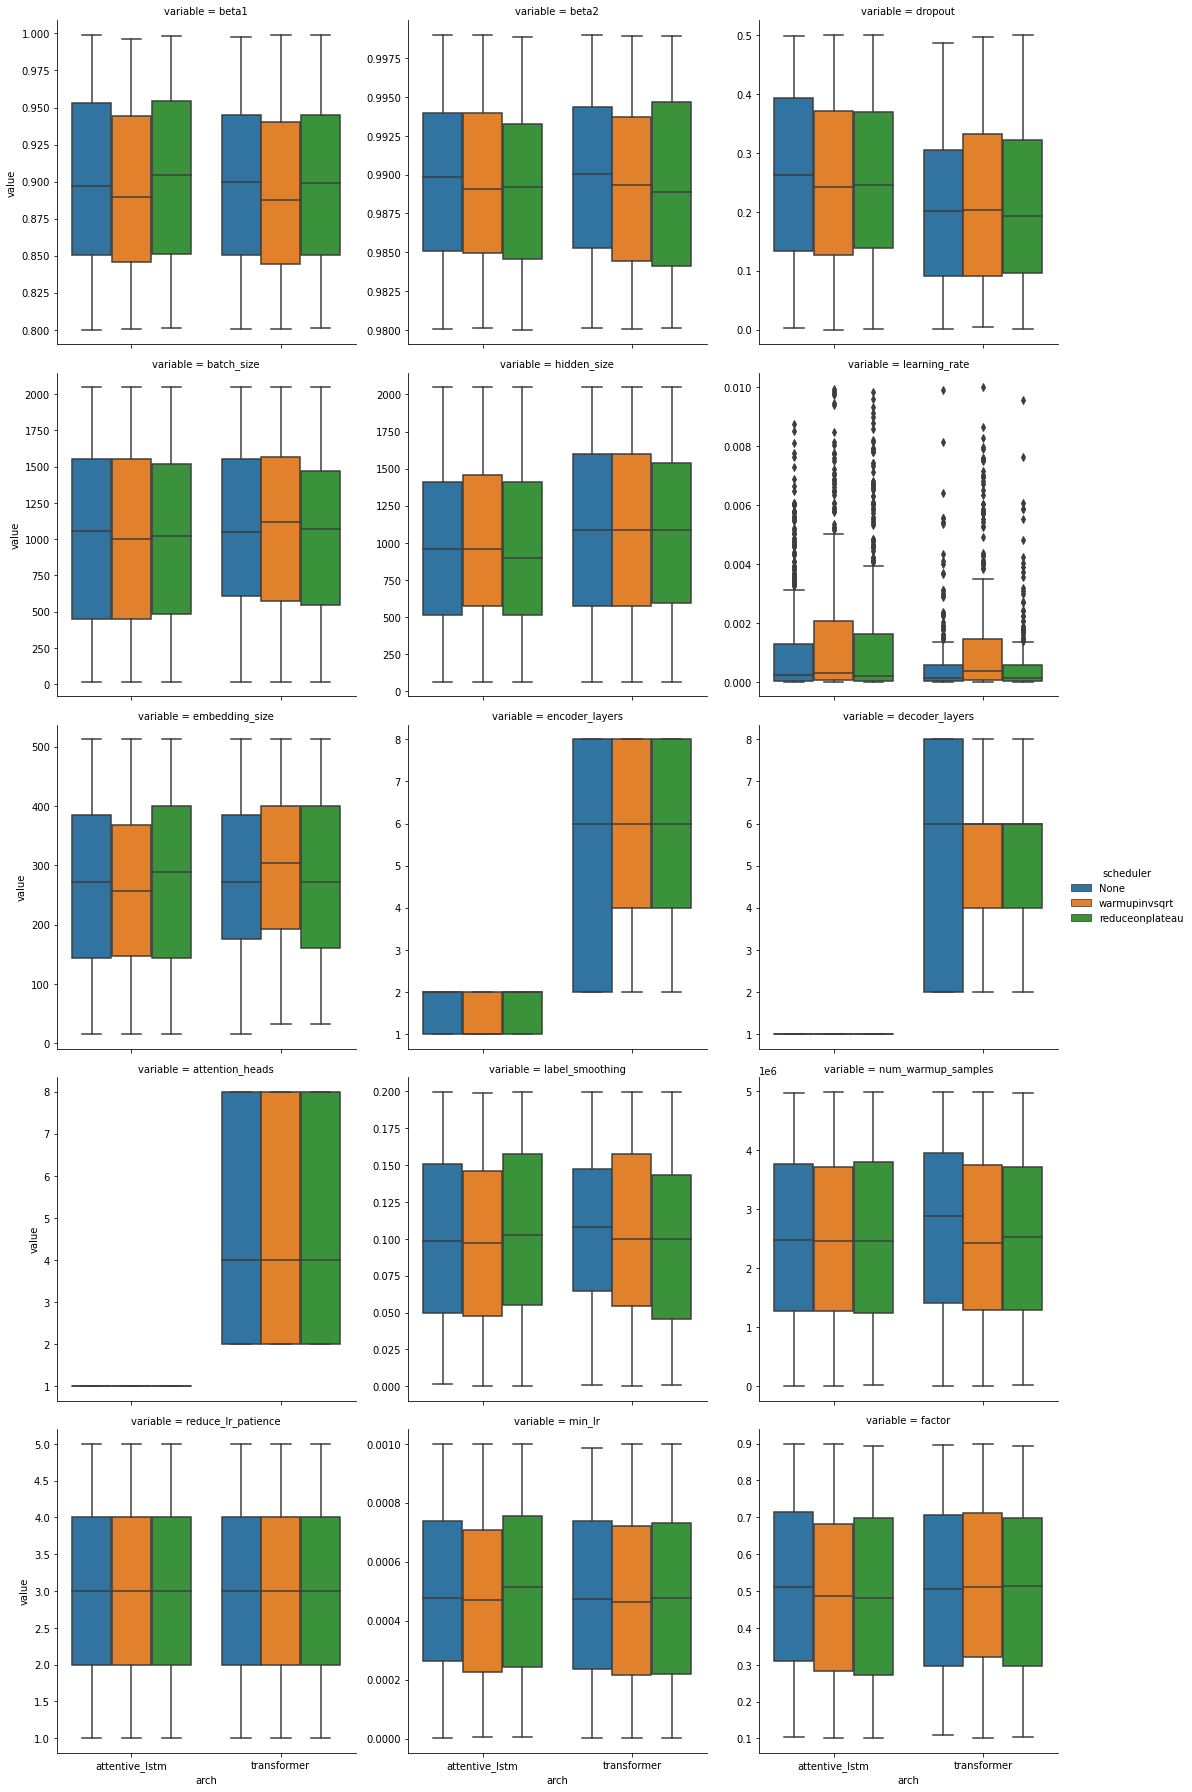

In [5]:
import seaborn as sns

varied_cols = filtered_infl_df[[
    "beta1", "beta2", "dropout", "batch_size", "hidden_size", "learning_rate",
    "embedding_size", "encoder_layers", "decoder_layers", "attention_heads","label_smoothing",
    "num_warmup_samples", "reduce_lr_patience", "min_lr", "factor", "scheduler",
    "lang", "arch", "max_val_accuracy"
]]
melted = pd.melt(varied_cols, id_vars=["lang", "arch", "max_val_accuracy", "scheduler"])
sns.catplot(
    melted,
    x="arch",
    y="value",
    hue="scheduler",
    col="variable",
    col_wrap=3,
    kind="box",
    sharey=False,
)
# filtered_infl_df.columns

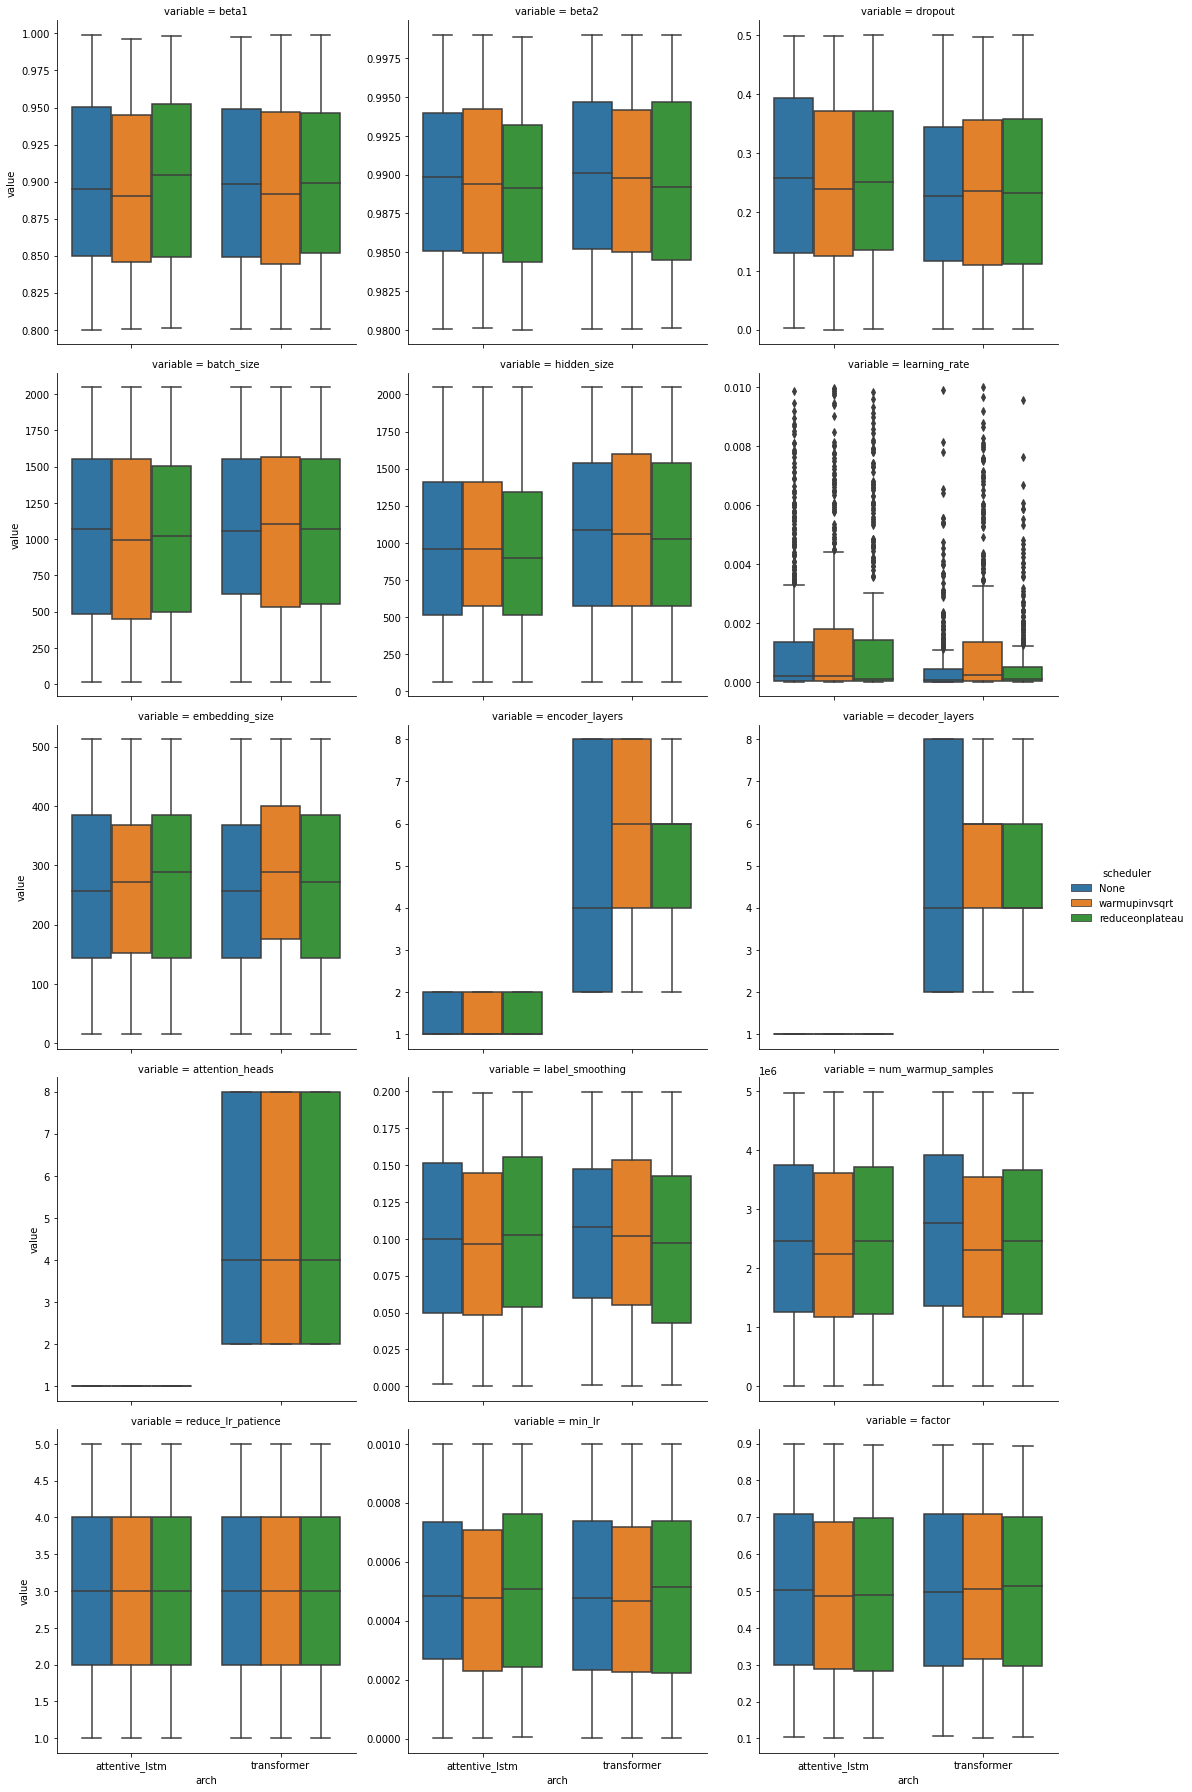

In [6]:
varied_cols = near_zero_infl_df[[
    "beta1", "beta2", "dropout", "batch_size", "hidden_size", "learning_rate",
    "embedding_size", "encoder_layers", "decoder_layers", "attention_heads","label_smoothing",
    "num_warmup_samples", "reduce_lr_patience", "min_lr", "factor", "scheduler",
    "lang", "arch", "max_val_accuracy"
]]
melted = pd.melt(varied_cols, id_vars=["lang", "arch", "max_val_accuracy", "scheduler"])
sns.catplot(
    melted,
    x="arch",
    y="value",
    hue="scheduler",
    col="variable",
    col_wrap=3,
    kind="box",
    sharey=False,
)
# filtered_infl_df.columns

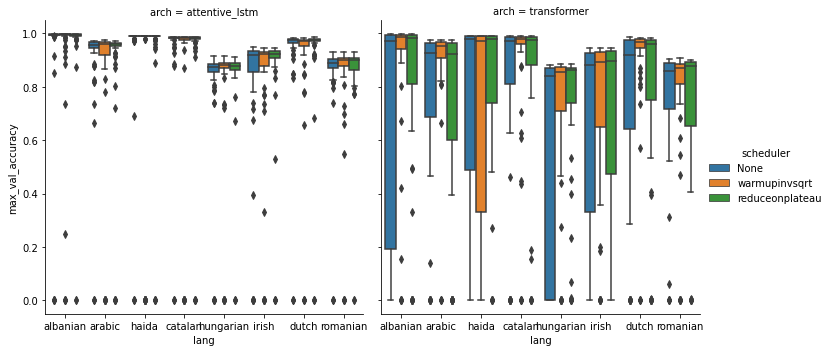

In [7]:
import seaborn as sns

sns.catplot(
    infl_df,
    x="lang",
    y="max_val_accuracy",
    hue="scheduler",
    col="arch",
    kind="box"
)

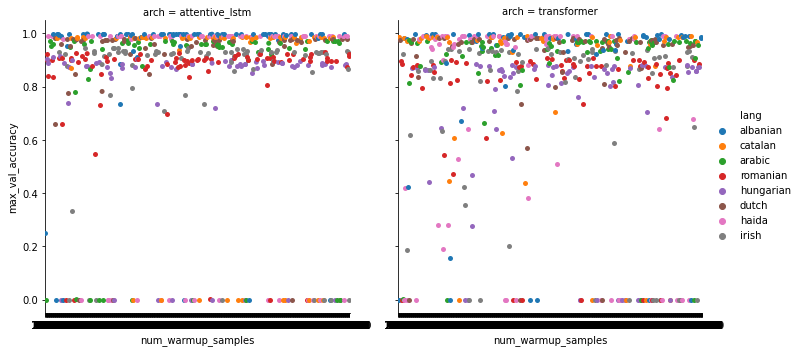

In [64]:
sns.catplot(
    infl_df.loc[infl_df["scheduler"] == "warmupinvsqrt"],
    x="num_warmup_samples",
    y="max_val_accuracy",
    hue="lang",
    col="arch",
)

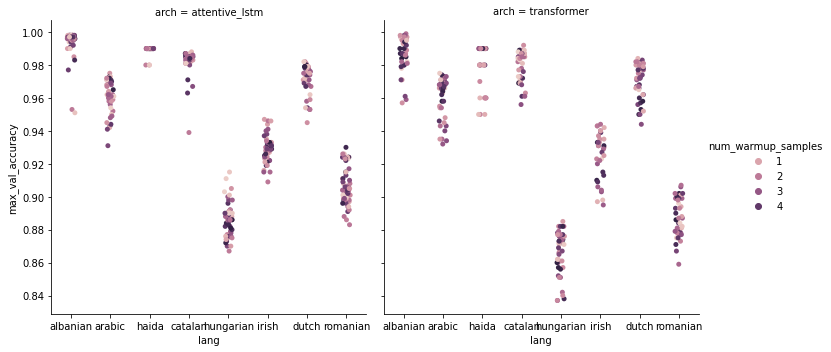

In [9]:
sns.catplot(
    filtered_infl_df.loc[filtered_infl_df["scheduler"] == "warmupinvsqrt"],
    x="lang",
    y="max_val_accuracy",
    hue="num_warmup_samples",
    col="arch",
)

<AxesSubplot:xlabel='embedding_size', ylabel='max_val_accuracy'>

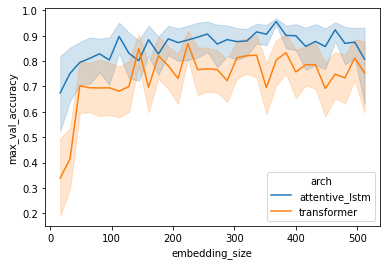

In [10]:
sns.lineplot(
    infl_df,
    x="embedding_size",
    y="max_val_accuracy",
    hue="arch",
#     col="arch",
)

<AxesSubplot:xlabel='hidden_size', ylabel='max_val_accuracy'>

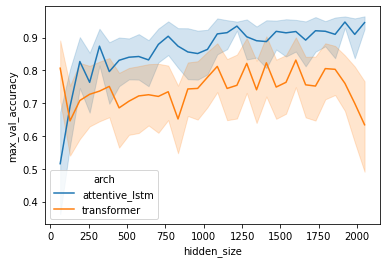

In [11]:
sns.lineplot(
    infl_df,
    x="hidden_size",
    y="max_val_accuracy",
    hue="arch",
#     col="arch",
)

<AxesSubplot:xlabel='dropout', ylabel='max_val_accuracy'>

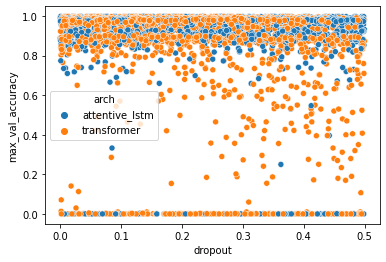

In [20]:
sns.scatterplot(
    infl_df,
    x="dropout",
    y="max_val_accuracy",
    hue="arch",
)

[None]

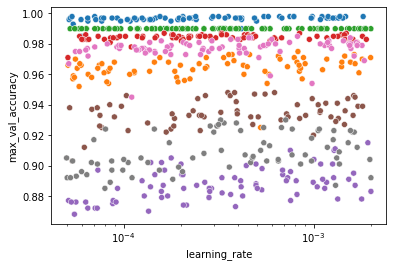

In [49]:
g = sns.scatterplot(
    infl_df.loc[
        (infl_df["learning_rate"] >= 0.00005) & 
        (infl_df["learning_rate"] <= 0.002) &
        (infl_df["arch"] == "attentive_lstm")
    ],
    x="learning_rate",
    y="max_val_accuracy",
    hue="lang",
)
g.legend().remove()
g.set(xscale="log")

[None]

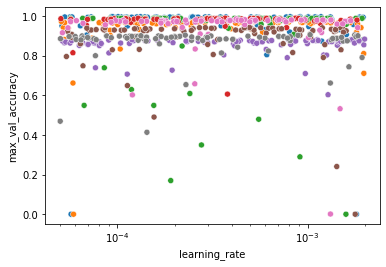

In [48]:
g = sns.scatterplot(
    infl_df.loc[
        (infl_df["learning_rate"] >= 0.00005) & 
        (infl_df["learning_rate"] <= 0.002) &
        (infl_df["arch"] == "transformer")
    ],
    x="learning_raate",
    y="max_val_accuracy",
    hue="lang",
)
g.legend().remove()
g.set(xscale="log")

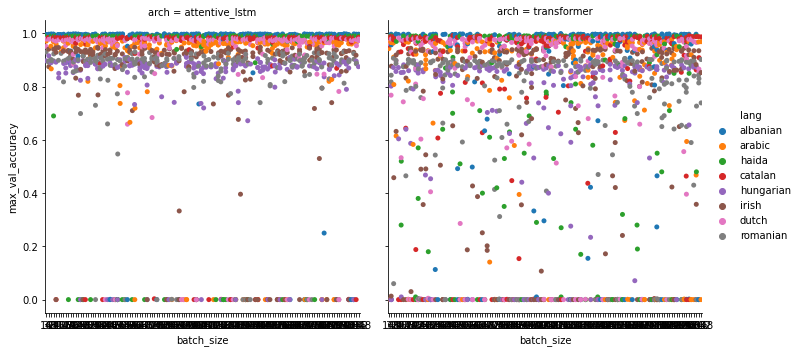

In [39]:
g = sns.catplot(
    infl_df,
    x="batch_size",
    y="max_val_accuracy",
    hue="lang",
    col="arch",
)
# g.set(xscale="log")

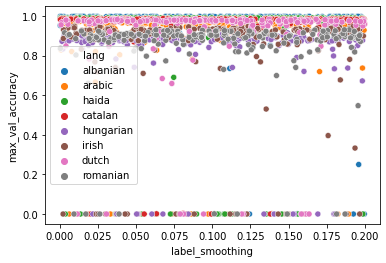

In [54]:
g = sns.scatterplot(
    infl_df.loc[infl_df["arch"] == "attentive_lstm"],
    x="label_smoothing",
    y="max_val_accuracy",
    hue="lang",
)

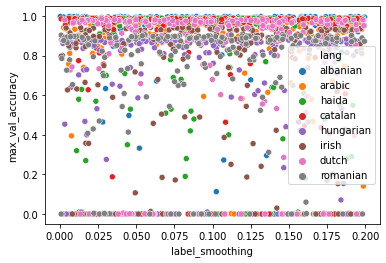

In [55]:
g = sns.scatterplot(
    infl_df.loc[infl_df["arch"] == "transformer"],
    x="label_smoothing",
    y="max_val_accuracy",
    hue="lang",
)

[None]

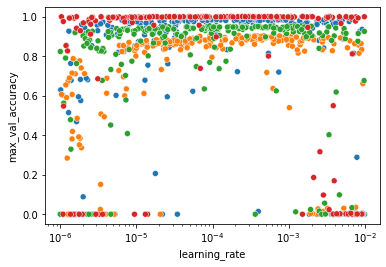

In [58]:
g = sns.scatterplot(
    g2p_df.loc[
#         (g2p_df["learning_rate"] >= 0.00005) & 
#         (g2p_df["learning_rate"] <= 0.002) &
        (g2p_df["arch"] == "transformer")
    ],
    x="learning_rate",
    y="max_val_accuracy",
    hue="lang",
)
g.legend().remove()
g.set(xscale="log")

[None]

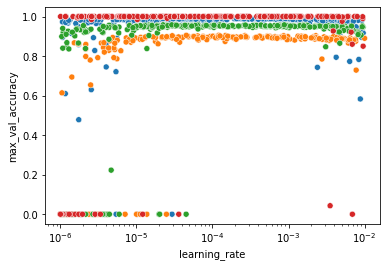

In [59]:
g = sns.scatterplot(
    g2p_df.loc[
#         (g2p_df["learning_rate"] >= 0.00005) & 
#         (g2p_df["learning_rate"] <= 0.002) &
        (g2p_df["arch"] == "attentive_lstm")
    ],
    x="learning_rate",
    y="max_val_accuracy",
    hue="lang",
)
g.legend().remove()
g.set(xscale="log")

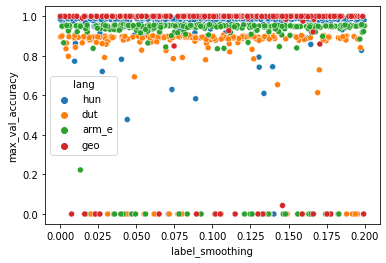

In [61]:
g = sns.scatterplot(
    g2p_df.loc[g2p_df["arch"] == "attentive_lstm"],
    x="label_smoothing",
    y="max_val_accuracy",
    hue="lang",
)

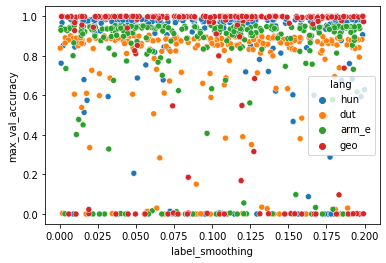

In [60]:
g = sns.scatterplot(
    g2p_df.loc[g2p_df["arch"] == "transformer"],
    x="label_smoothing",
    y="max_val_accuracy",
    hue="lang",
)

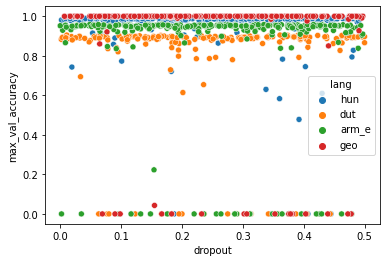

In [62]:
g = sns.scatterplot(
    g2p_df.loc[g2p_df["arch"] == "attentive_lstm"],
    x="dropout",
    y="max_val_accuracy",
    hue="lang",
)

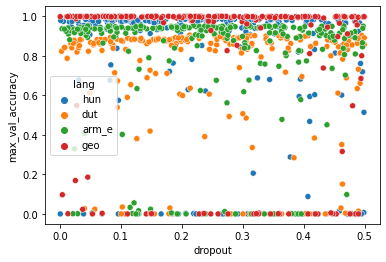

In [63]:
g = sns.scatterplot(
    g2p_df.loc[g2p_df["arch"] == "transformer"],
    x="dropout",
    y="max_val_accuracy",
    hue="lang",
)